In [2]:
import matplotlib.pyplot as plt
import matplotlib_inline
import scienceplots
plt.style.use(['science','no-latex'])
matplotlib_inline.backend_inline.set_matplotlib_formats("svg")

### Артефакты моделей

Артефакты моделей были загружены в соответствующий репозиторий на [HuggingFace]()

За основу для экспериментов по DPO-алайменту была взята инструктированная модель [SmolLM2-135M-Instruct](https://huggingface.co/HuggingFaceTB/SmolLM2-135M-Instruct). В качестве набора данных использовался был взят [ultrafeedback_binarized](https://huggingface.co/datasets/trl-lib/ultrafeedback_binarized).


### __Параметры для Reverse KL__

Шаг обучения $5e-5$, коэффициент при слагаемом дивергенции $\beta \in [0.05, 0.1, 1.0, 5.0]$, размер батча $4$, шаг накопления градиента $4$, количество итераций $200$, максимальная длина промтов $1024$

### __Параметры для Forward KL__

Шаг обучения $5e-5$, коэффициент при слагаемом дивергенции $\beta = 0.1$, размер батча $4$, шаг накопления градиента $4$, количество итераций $200$, максимальная длина промтов $1024$

### __Параметры для $\alpha$-divergence__

Шаг обучения $5e-5$, коэффициент при слагаемом дивергенции $\beta = 0.1$, показатель степени $\alpha$-дивергенции $\alpha=0.5$, размер батча $4$, шаг накопления градиента $4$, количество итераций $200$, максимальная длина промтов $1024$

### __Параметры для JS-divergence__

Шаг обучения $5e-5$, коэффициент при слагаемом дивергенции $\beta = 0.1$, размер батча $4$, шаг накопления градиента $4$, количество итераций $200$, максимальная длина промтов $1024$

### __Параметры генерации ответов__

Были взяты следубщие параметры. Температура $1.0$, top_p $0.95$, максимальная длина генерируемого текста $512$


### __Как рассчитывалась KL-дивергенция__

Фиксируем 100 тестовых промтов. Двумя взятыми моделями генерируем ответы для каждого промта. На основе выходных логитов модели рассчитываем KL-дивергенцию для каждой пары ответов. В конце усредняем.

TypeError: hlines() missing 3 required positional arguments: 'y', 'xmin', and 'xmax'

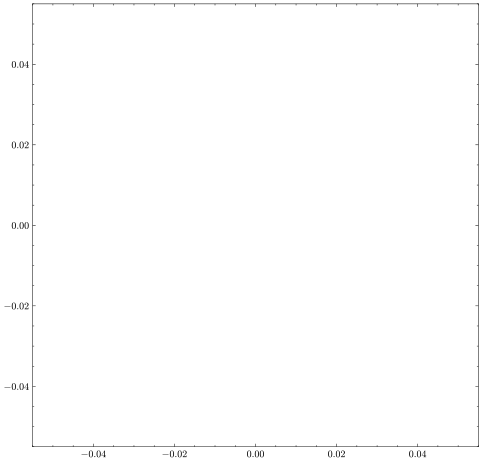

In [5]:
plt.figure(figsize=(8,8))

plt.plot()

plt.hlines()

plt.show()